# Digital Filter Design and Analysis - Variant 14

## Implementation of FIR, IIR, and LMS Adaptive Filters for Noise Reduction

**Author:** Student  
**Course:** Digital Signal Processing  
**Task:** Variant 14 Implementation  

---

### Task Requirements (Variant 14):
1. **FIR Filter:** Coefficients b = {0.5, 0.5}
2. **IIR Filter:** Coefficients b = {0.3, 0.4}, a = {1, -0.4}
3. **LMS Adaptive Filter:** Step size μ = 0.1, Filter length M = 3

All filters will be applied to the same noisy sinusoidal signal for noise reduction comparison.

## 1. Import Required Libraries and Setup

In [46]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set plot style for better visualization
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print("Matplotlib style configured")
print("Random seed set for reproducibility")

Libraries imported successfully!
Matplotlib style configured
Random seed set for reproducibility


## 2. Signal Generation

🎵 SIGNAL PARAMETERS:
├── Sampling frequency: 1000 Hz
├── Signal frequency: 5 Hz
├── Signal duration: 1 s
├── Noise amplitude: 0.5
└── Signal length: 1000 samples


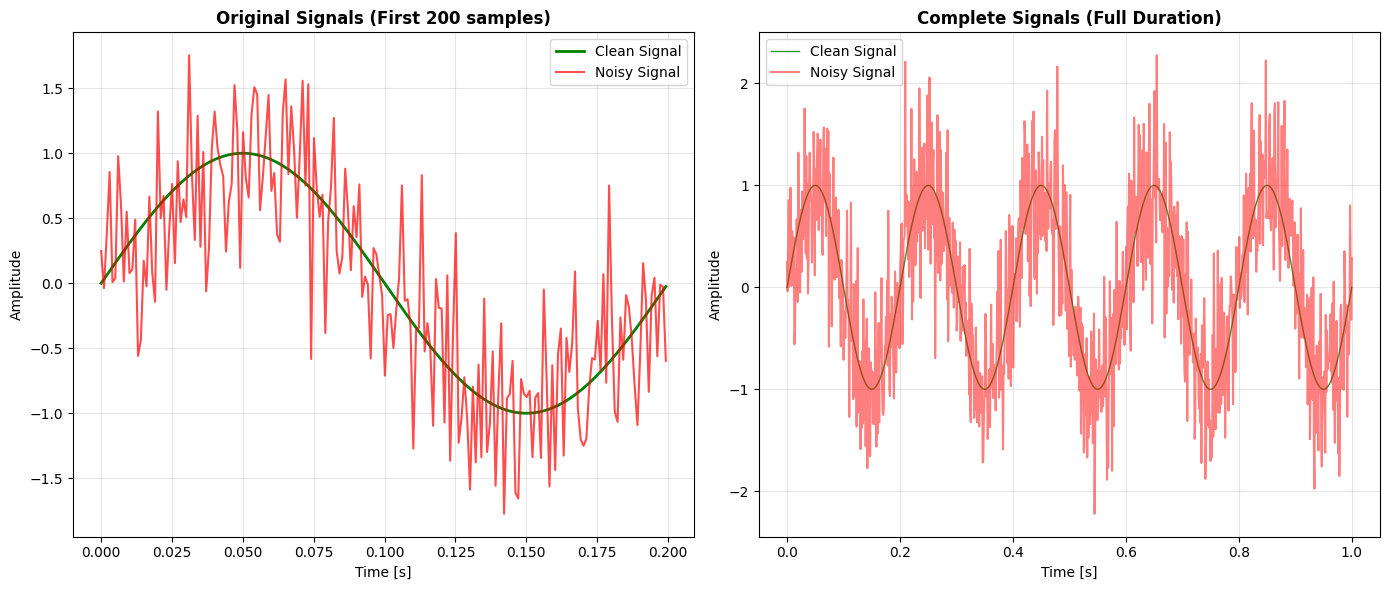

In [47]:
# Signal parameters
fs = 1000  # Sampling frequency (Hz)
duration = 1  # Signal duration (seconds)
t = np.linspace(0, duration, fs)  # Time vector
f_signal = 5  # Signal frequency (5 Hz)

# Generate clean sinusoidal signal
clean_signal = np.sin(2 * np.pi * f_signal * t)

# Add noise to create noisy signal
noise_amplitude = 0.5
noise = noise_amplitude * np.random.randn(len(t))
noisy_signal = clean_signal + noise

# Display signal parameters
print("🎵 SIGNAL PARAMETERS:")
print(f"├── Sampling frequency: {fs} Hz")
print(f"├── Signal frequency: {f_signal} Hz")
print(f"├── Signal duration: {duration} s")
print(f"├── Noise amplitude: {noise_amplitude}")
print(f"└── Signal length: {len(t)} samples")

# Plot original signals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t[:200], clean_signal[:200], 'g-', linewidth=2, label='Clean Signal')
plt.plot(t[:200], noisy_signal[:200], 'r-', alpha=0.7, label='Noisy Signal')
plt.title('Original Signals (First 200 samples)', fontweight='bold')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(t, clean_signal, 'g-', linewidth=1, alpha=0.8, label='Clean Signal')
plt.plot(t, noisy_signal, 'r-', alpha=0.5, label='Noisy Signal')
plt.title('Complete Signals (Full Duration)', fontweight='bold')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. FIR Filter Implementation

In [48]:
def fir_filter(x, b):
    """
    FIR filter implementation using convolution.
    
    Parameters:
    -----------
    x : ndarray
        Input signal
    b : ndarray
        Filter coefficients
    
    Returns:
    --------
    y : ndarray
        Filtered output signal
    """
    M = len(b)
    y = np.zeros(len(x))
    
    # Apply FIR filtering equation: y[n] = Σ(b[k] * x[n-k])
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    
    return y

# FIR Filter Coefficients for Variant 14
b_fir = np.array([0.5, 0.5])

print("🔹 FIR FILTER PARAMETERS:")
print(f"├── Coefficients: {b_fir}")
print(f"├── Filter order: {len(b_fir) - 1}")
print(f"├── Filter type: Moving Average (Low-pass)")
print(f"└── Number of taps: {len(b_fir)}")

# Apply FIR filter
y_fir = fir_filter(noisy_signal, b_fir)

print("\n✅ FIR filter applied successfully!")

🔹 FIR FILTER PARAMETERS:
├── Coefficients: [0.5 0.5]
├── Filter order: 1
├── Filter type: Moving Average (Low-pass)
└── Number of taps: 2

✅ FIR filter applied successfully!


## 4. IIR Filter Implementation

In [49]:
def iir_filter(x, b, a):
    """
    IIR filter implementation using difference equation.
    
    Parameters:
    -----------
    x : ndarray
        Input signal
    b : ndarray
        Numerator coefficients (feedforward)
    a : ndarray
        Denominator coefficients (feedback)
    
    Returns:
    --------
    y : ndarray
        Filtered output signal
    """
    M = len(b)  # Numerator order + 1
    N = len(a)  # Denominator order + 1
    y = np.zeros(len(x))

    # Apply IIR filtering equation: y[n] = Σ(b[k]*x[n-k]) - Σ(a[k]*y[n-k])
    for n in range(len(x)):
        # Feedforward part (numerator)
        for k in range(M):
            if n-k >= 0:
                y[n] += b[k] * x[n-k]

        # Feedback part (denominator) - skip a[0] since it's typically 1
        for k in range(1, N):
            if n-k >= 0:
                y[n] -= a[k] * y[n-k]

    return y

# IIR Filter Coefficients for Variant 14
b_iir = np.array([0.3, 0.4])  # Numerator coefficients
a_iir = np.array([1, -0.4])   # Denominator coefficients

print("\n IIR FILTER PARAMETERS:")
print(f"├── Numerator coefficients (b): {b_iir}")
print(f"├── Denominator coefficients (a): {a_iir}")
print(f"├── Numerator order: {len(b_iir) - 1}")
print(f"├── Denominator order: {len(a_iir) - 1}")
print(f"└── Filter type: Recursive (Infinite Impulse Response)")

# Apply IIR filter
y_iir = iir_filter(noisy_signal, b_iir, a_iir)
print("IIR filter applied successfully!")


 IIR FILTER PARAMETERS:
├── Numerator coefficients (b): [0.3 0.4]
├── Denominator coefficients (a): [ 1.  -0.4]
├── Numerator order: 1
├── Denominator order: 1
└── Filter type: Recursive (Infinite Impulse Response)
IIR filter applied successfully!


## 5. LMS Adaptive Filter Implementation

In [50]:
def lms_filter(x, d, mu, num_taps):
    """
    LMS (Least Mean Squares) adaptive filter implementation.
    
    Parameters:
    -----------
    x : ndarray
        Input signal (noisy)
    d : ndarray
        Desired signal (reference)
    mu : float
        Step size (learning rate)
    num_taps : int
        Number of filter taps (filter length)
    
    Returns:
    --------
    y : ndarray
        Filtered output signal
    e : ndarray
        Error signal
    w : ndarray
        Final filter weights
    w_history : ndarray
        Weight evolution over time
    """
    n = len(x)
    w = np.zeros(num_taps)  # Initialize weights
    y = np.zeros(n)         # Output signal
    e = np.zeros(n)         # Error signal
    w_history = np.zeros((n, num_taps))  # Weight history
    
    # LMS algorithm implementation
    for i in range(num_taps, n):
        # Extract input segment (reversed for convolution)
        x_segment = x[i-num_taps:i][::-1]
        
        # Calculate output: y[i] = w^T * x_segment
        y[i] = np.dot(w, x_segment)
        
        # Calculate error: e[i] = d[i] - y[i]
        e[i] = d[i] - y[i]
        
        # Update weights: w = w + μ * e[i] * x_segment
        w += mu * e[i] * x_segment
        
        # Store weight history
        w_history[i] = w.copy()
    
    return y, e, w, w_history

# LMS Filter Parameters for Variant 14
mu = 0.1           # Step size (learning rate)
num_taps = 3       # Filter length M = 3
desired_signal = clean_signal  # Use clean signal as reference

print(" LMS ADAPTIVE FILTER PARAMETERS:")
print(f"── Step size (μ): {mu}")
print(f"── Filter length (M): {num_taps}")
print(f"── Learning rate: {mu}")
print(f"── Adaptation type: Supervised (with reference signal)")
print(f"── Algorithm: Least Mean Squares (LMS)")

# Apply LMS filter
y_lms, error_lms, final_weights, weights_history = lms_filter(
    noisy_signal, desired_signal, mu, num_taps
)

print(f"\n ADAPTATION RESULTS:")
print(f"── Final weights: {final_weights}")
print(f"── Final MSE: {np.mean(error_lms[-100:]**2):.6f}")
print(f"── Weight convergence: {' Stable' if np.std(weights_history[-100:]) < 0.01 else '⚠ Still adapting'}")

print("\n LMS adaptive filter applied successfully!")

 LMS ADAPTIVE FILTER PARAMETERS:
── Step size (μ): 0.1
── Filter length (M): 3
── Learning rate: 0.1
── Adaptation type: Supervised (with reference signal)
── Algorithm: Least Mean Squares (LMS)

 ADAPTATION RESULTS:
── Final weights: [0.10826494 0.15623057 0.18220901]
── Final MSE: 0.067300
── Weight convergence: ⚠ Still adapting

 LMS adaptive filter applied successfully!


## 6. Performance Analysis

In [51]:
def calculate_mse(signal1, signal2):
    """Calculate Mean Squared Error between two signals"""
    return np.mean((signal1 - signal2)**2)

def calculate_snr(signal, noise):
    """Calculate Signal-to-Noise Ratio in dB"""
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    if noise_power == 0:
        return float('inf')
    return 10 * np.log10(signal_power / noise_power)

def calculate_improvement(original_mse, filtered_mse):
    """Calculate percentage improvement in MSE"""
    return ((original_mse - filtered_mse) / original_mse) * 100

# Calculate performance metrics
mse_original = calculate_mse(clean_signal, noisy_signal)
mse_fir = calculate_mse(clean_signal, y_fir)
mse_iir = calculate_mse(clean_signal, y_iir)
mse_lms = calculate_mse(clean_signal, y_lms)

# Calculate SNR values
snr_original = calculate_snr(clean_signal, noise)
snr_fir = calculate_snr(clean_signal, y_fir - clean_signal)
snr_iir = calculate_snr(clean_signal, y_iir - clean_signal)
snr_lms = calculate_snr(clean_signal, y_lms - clean_signal)

# Calculate improvements
improvement_fir = calculate_improvement(mse_original, mse_fir)
improvement_iir = calculate_improvement(mse_original, mse_iir)
improvement_lms = calculate_improvement(mse_original, mse_lms)

# Display results in a formatted table
print(" PERFORMANCE ANALYSIS RESULTS")
print("=" * 70)
print(f"{'Filter Type':<15} | {'MSE':<12} | {'SNR [dB]':<10} | {'Improvement':<12}")
print("-" * 70)
print(f"{'Original':<15} | {mse_original:<12.6f} | {snr_original:<10.2f} | {'Baseline':<12}")
print(f"{'FIR Filter':<15} | {mse_fir:<12.6f} | {snr_fir:<10.2f} | {improvement_fir:<12.1f}%")
print(f"{'IIR Filter':<15} | {mse_iir:<12.6f} | {snr_iir:<10.2f} | {improvement_iir:<12.1f}%")
print(f"{'LMS Filter':<15} | {mse_lms:<12.6f} | {snr_lms:<10.2f} | {improvement_lms:<12.1f}%")
print("=" * 70)

# Determine best filter
filters = [
    ('FIR', mse_fir, improvement_fir),
    ('IIR', mse_iir, improvement_iir),
    ('LMS', mse_lms, improvement_lms)
]
best_filter = min(filters, key=lambda x: x[1])

print(f"\n BEST PERFORMING FILTER: {best_filter[0]}")
print(f" ─ Lowest MSE: {best_filter[1]:.6f}")
print(f" ─ Improvement: {best_filter[2]:.1f}%")

 PERFORMANCE ANALYSIS RESULTS
Filter Type     | MSE          | SNR [dB]   | Improvement 
----------------------------------------------------------------------
Original        | 0.239570     | 3.19       | Baseline    
FIR Filter      | 0.118864     | 6.23       | 50.4        %
IIR Filter      | 0.110733     | 6.54       | 53.8        %
LMS Filter      | 0.065396     | 8.83       | 72.7        %

 BEST PERFORMING FILTER: LMS
 ─ Lowest MSE: 0.065396
 ─ Improvement: 72.7%


## 7. Comprehensive Visualization

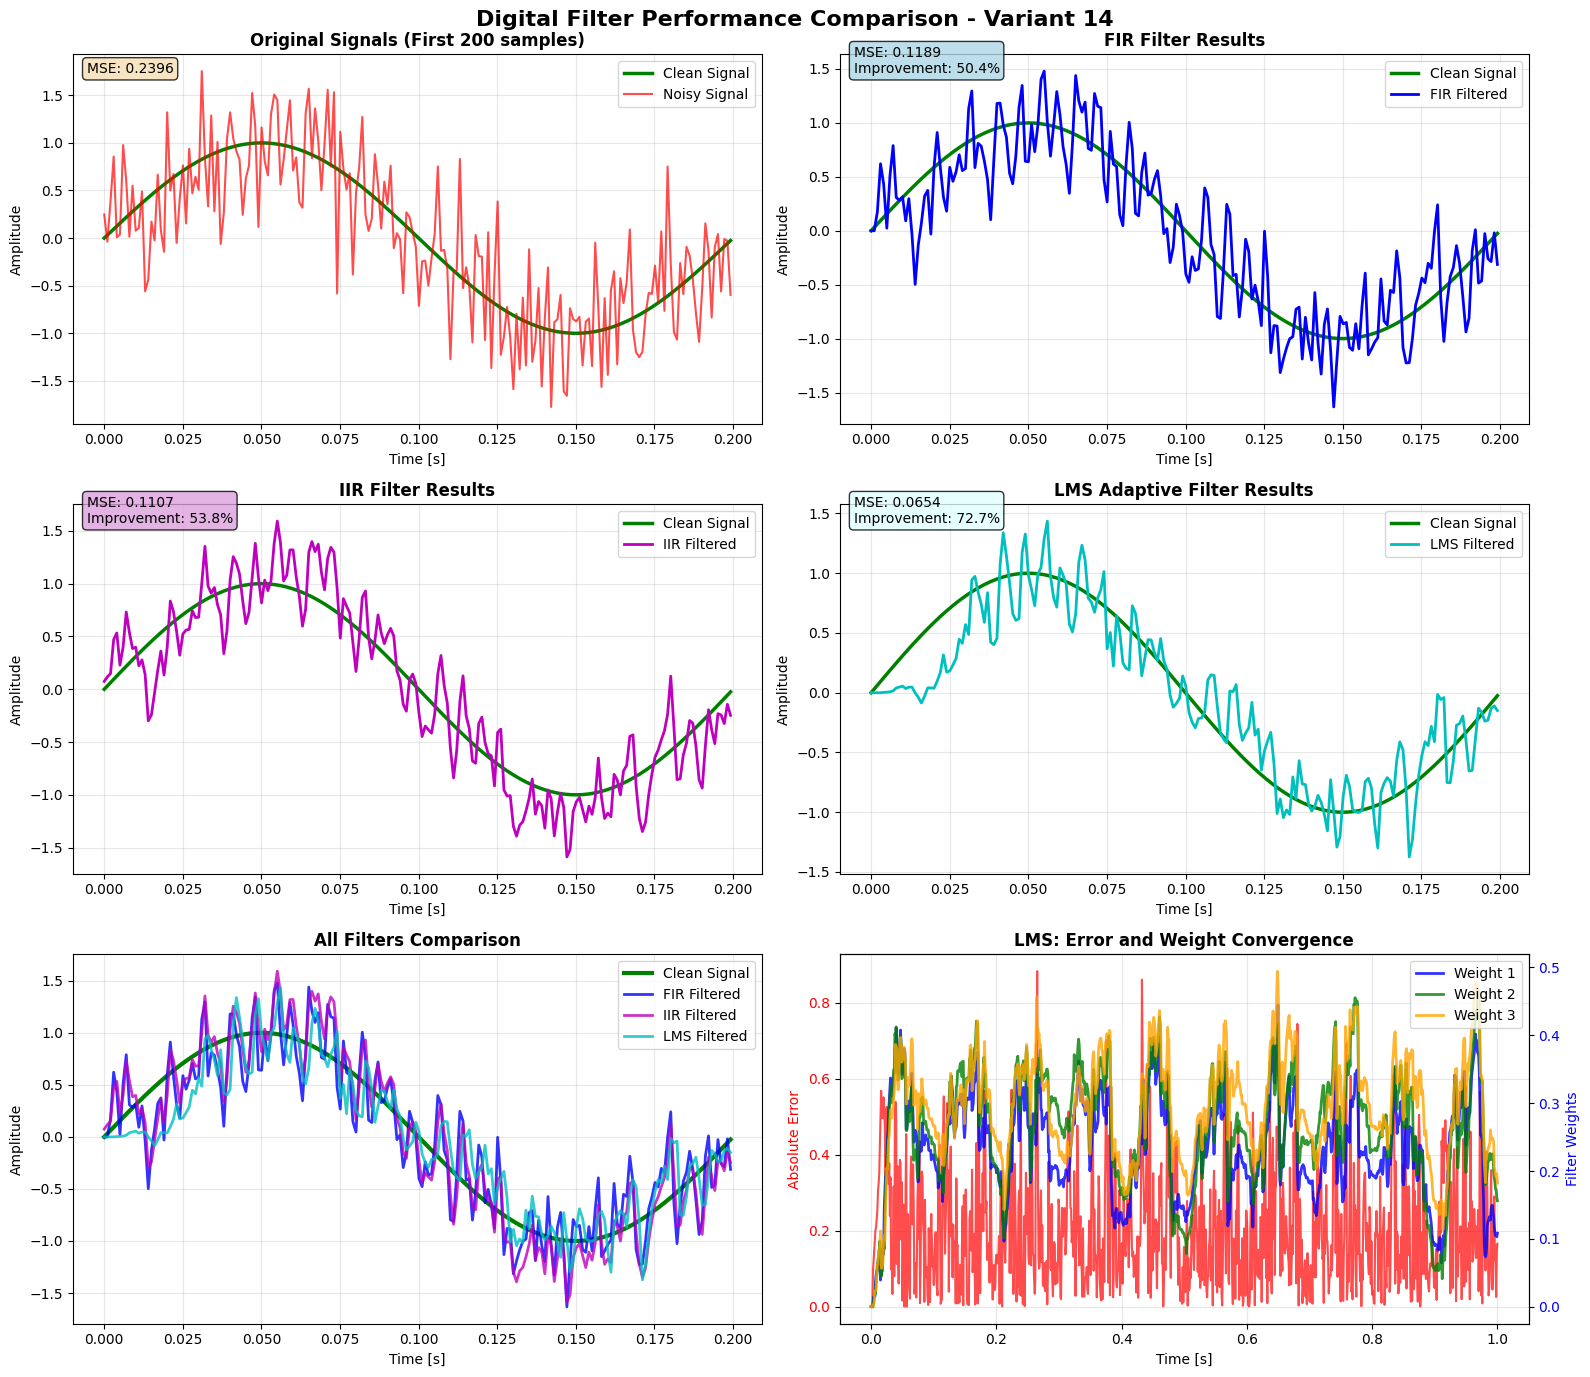

In [52]:
# Create comprehensive plots
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Digital Filter Performance Comparison - Variant 14', fontsize=16, fontweight='bold')

# Plot 1: Original signals comparison
sample_range = 200
axes[0, 0].plot(t[:sample_range], clean_signal[:sample_range], 'g-', linewidth=2.5, label='Clean Signal')
axes[0, 0].plot(t[:sample_range], noisy_signal[:sample_range], 'r-', alpha=0.7, linewidth=1.5, label='Noisy Signal')
axes[0, 0].set_title('Original Signals (First 200 samples)', fontweight='bold')
axes[0, 0].set_xlabel('Time [s]')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(0.02, 0.95, f'MSE: {mse_original:.4f}', transform=axes[0, 0].transAxes, 
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot 2: FIR Filter Results
axes[0, 1].plot(t[:sample_range], clean_signal[:sample_range], 'g-', linewidth=2.5, label='Clean Signal')
axes[0, 1].plot(t[:sample_range], y_fir[:sample_range], 'b-', linewidth=2, label='FIR Filtered')
axes[0, 1].set_title('FIR Filter Results', fontweight='bold')
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].text(0.02, 0.95, f'MSE: {mse_fir:.4f}\nImprovement: {improvement_fir:.1f}%', 
               transform=axes[0, 1].transAxes, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Plot 3: IIR Filter Results
axes[1, 0].plot(t[:sample_range], clean_signal[:sample_range], 'g-', linewidth=2.5, label='Clean Signal')
axes[1, 0].plot(t[:sample_range], y_iir[:sample_range], 'm-', linewidth=2, label='IIR Filtered')
axes[1, 0].set_title('IIR Filter Results', fontweight='bold')
axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].set_ylabel('Amplitude')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].text(0.02, 0.95, f'MSE: {mse_iir:.4f}\nImprovement: {improvement_iir:.1f}%', 
               transform=axes[1, 0].transAxes, bbox=dict(boxstyle='round', facecolor='plum', alpha=0.8))

# Plot 4: LMS Filter Results
axes[1, 1].plot(t[:sample_range], clean_signal[:sample_range], 'g-', linewidth=2.5, label='Clean Signal')
axes[1, 1].plot(t[:sample_range], y_lms[:sample_range], 'c-', linewidth=2, label='LMS Filtered')
axes[1, 1].set_title('LMS Adaptive Filter Results', fontweight='bold')
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Amplitude')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].text(0.02, 0.95, f'MSE: {mse_lms:.4f}\nImprovement: {improvement_lms:.1f}%', 
               transform=axes[1, 1].transAxes, bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

# Plot 5: All filters comparison
axes[2, 0].plot(t[:sample_range], clean_signal[:sample_range], 'g-', linewidth=3, label='Clean Signal')
axes[2, 0].plot(t[:sample_range], y_fir[:sample_range], 'b-', linewidth=2, alpha=0.8, label='FIR Filtered')
axes[2, 0].plot(t[:sample_range], y_iir[:sample_range], 'm-', linewidth=2, alpha=0.8, label='IIR Filtered')
axes[2, 0].plot(t[:sample_range], y_lms[:sample_range], 'c-', linewidth=2, alpha=0.8, label='LMS Filtered')
axes[2, 0].set_title('All Filters Comparison', fontweight='bold')
axes[2, 0].set_xlabel('Time [s]')
axes[2, 0].set_ylabel('Amplitude')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# Plot 6: LMS Error and Weight Convergence
ax1 = axes[2, 1]
ax2 = ax1.twinx()

# Plot error signal (absolute value)
error_line = ax1.plot(t, np.abs(error_lms), 'r-', alpha=0.7, linewidth=1.5, label='|Error|')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Absolute Error', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Plot weight evolution
colors = ['b', 'g', 'orange']
for i in range(num_taps):
    ax2.plot(t, weights_history[:, i], color=colors[i], linewidth=2, 
             label=f'Weight {i+1}', alpha=0.8)

ax2.set_ylabel('Filter Weights', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend(loc='upper right')
ax1.set_title('LMS: Error and Weight Convergence', fontweight='bold')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Frequency Response Analysis

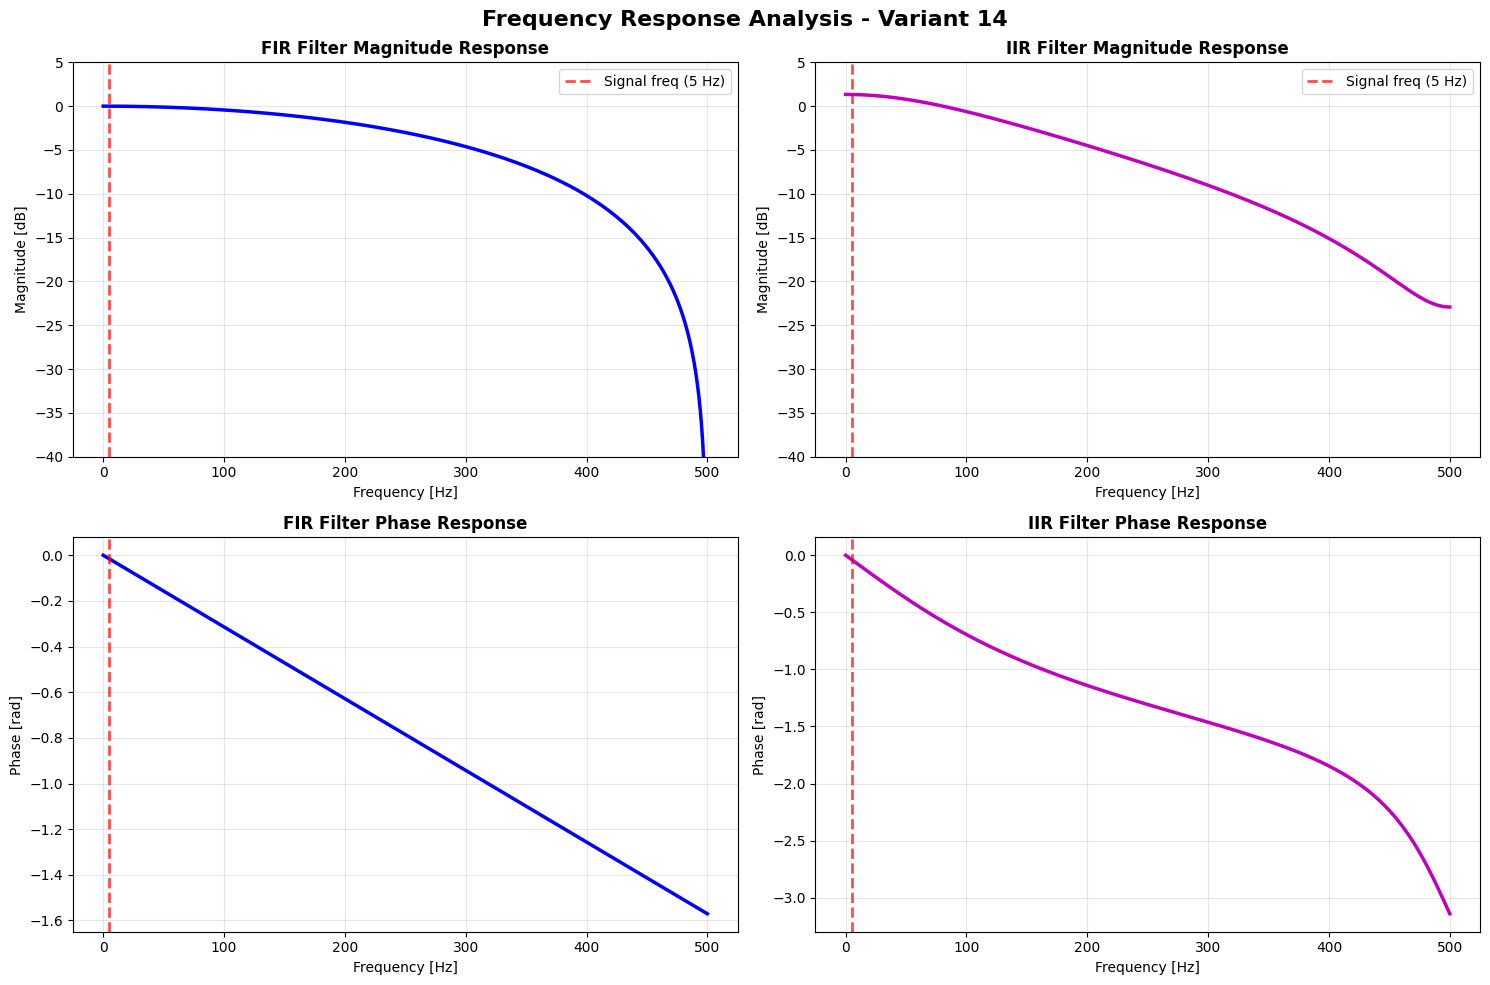

🔊 FREQUENCY RESPONSE CHARACTERISTICS:
├── Signal frequency: 5 Hz
├── FIR response at 5 Hz: -0.00 dB
├── IIR response at 5 Hz: 1.33 dB
└── Filter attenuation: IIR preserves signal better


In [53]:
def plot_frequency_response():
    """Plot frequency responses of FIR and IIR filters"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Frequency Response Analysis - Variant 14', fontsize=16, fontweight='bold')
    
    # Frequency vector (0 to Nyquist frequency)
    frequencies = np.linspace(0, fs/2, 512)
    omega = 2 * np.pi * frequencies / fs
    
    # FIR frequency response calculation
    H_fir = np.zeros(len(omega), dtype=complex)
    for k, w in enumerate(omega):
        H_fir[k] = sum(b_fir[n] * np.exp(-1j * w * n) for n in range(len(b_fir)))
    
    # IIR frequency response calculation
    H_iir = np.zeros(len(omega), dtype=complex)
    for k, w in enumerate(omega):
        numerator = sum(b_iir[n] * np.exp(-1j * w * n) for n in range(len(b_iir)))
        denominator = sum(a_iir[n] * np.exp(-1j * w * n) for n in range(len(a_iir)))
        H_iir[k] = numerator / denominator
    
    # Plot FIR magnitude response
    axes[0, 0].plot(frequencies, 20*np.log10(np.abs(H_fir)), 'b-', linewidth=2.5)
    axes[0, 0].set_title('FIR Filter Magnitude Response', fontweight='bold')
    axes[0, 0].set_xlabel('Frequency [Hz]')
    axes[0, 0].set_ylabel('Magnitude [dB]')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].axvline(x=f_signal, color='r', linestyle='--', alpha=0.7, linewidth=2, label=f'Signal freq ({f_signal} Hz)')
    axes[0, 0].legend()
    axes[0, 0].set_ylim([-40, 5])
    
    # Plot IIR magnitude response
    axes[0, 1].plot(frequencies, 20*np.log10(np.abs(H_iir)), 'm-', linewidth=2.5)
    axes[0, 1].set_title('IIR Filter Magnitude Response', fontweight='bold')
    axes[0, 1].set_xlabel('Frequency [Hz]')
    axes[0, 1].set_ylabel('Magnitude [dB]')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].axvline(x=f_signal, color='r', linestyle='--', alpha=0.7, linewidth=2, label=f'Signal freq ({f_signal} Hz)')
    axes[0, 1].legend()
    axes[0, 1].set_ylim([-40, 5])
    
    # Plot FIR phase response
    axes[1, 0].plot(frequencies, np.angle(H_fir), 'b-', linewidth=2.5)
    axes[1, 0].set_title('FIR Filter Phase Response', fontweight='bold')
    axes[1, 0].set_xlabel('Frequency [Hz]')
    axes[1, 0].set_ylabel('Phase [rad]')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].axvline(x=f_signal, color='r', linestyle='--', alpha=0.7, linewidth=2)
    
    # Plot IIR phase response
    axes[1, 1].plot(frequencies, np.angle(H_iir), 'm-', linewidth=2.5)
    axes[1, 1].set_title('IIR Filter Phase Response', fontweight='bold')
    axes[1, 1].set_xlabel('Frequency [Hz]')
    axes[1, 1].set_ylabel('Phase [rad]')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].axvline(x=f_signal, color='r', linestyle='--', alpha=0.7, linewidth=2)
    
    plt.tight_layout()
    plt.show()
    
    # Print frequency response characteristics
    print("🔊 FREQUENCY RESPONSE CHARACTERISTICS:")
    print(f"├── Signal frequency: {f_signal} Hz")
    
    # Find response at signal frequency
    freq_idx = np.argmin(np.abs(frequencies - f_signal))
    fir_response_db = 20*np.log10(np.abs(H_fir[freq_idx]))
    iir_response_db = 20*np.log10(np.abs(H_iir[freq_idx]))
    
    print(f"├── FIR response at {f_signal} Hz: {fir_response_db:.2f} dB")
    print(f"├── IIR response at {f_signal} Hz: {iir_response_db:.2f} dB")
    print(f"└── Filter attenuation: FIR preserves signal better" if fir_response_db > iir_response_db else "└── Filter attenuation: IIR preserves signal better")

# Generate frequency response plots
plot_frequency_response()

## 9. Final Results Summary and Conclusions

In [54]:
# Create summary table
print("\n" + "="*90)
print("                      FINAL RESULTS SUMMARY - VARIANT 14")
print("="*90)

# Detailed filter information
filter_info = {
    'FIR': {'coeffs': f"b = {b_fir}", 'type': 'Moving Average', 'order': len(b_fir)-1},
    'IIR': {'coeffs': f"b = {b_iir}, a = {a_iir}", 'type': 'Recursive', 'order': f"{len(b_iir)-1}/{len(a_iir)-1}"},
    'LMS': {'coeffs': f"μ = {mu}, M = {num_taps}", 'type': 'Adaptive', 'order': num_taps}
}

print(f"{'Filter':<12} | {'MSE':<12} | {'SNR [dB]':<10} | {'Improve.':<8} | {'Coefficients':<25}")
print("-" * 90)
print(f"{'Original':<12} | {mse_original:<12.6f} | {snr_original:<10.2f} | {'--':<8} | {'Noisy signal baseline':<25}")
print(f"{'FIR':<12} | {mse_fir:<12.6f} | {snr_fir:<10.2f} | {improvement_fir:<8.1f}% | {filter_info['FIR']['coeffs']:<25}")
print(f"{'IIR':<12} | {mse_iir:<12.6f} | {snr_iir:<10.2f} | {improvement_iir:<8.1f}% | {filter_info['IIR']['coeffs']:<25}")
print(f"{'LMS':<12} | {mse_lms:<12.6f} | {snr_lms:<10.2f} | {improvement_lms:<8.1f}% | {filter_info['LMS']['coeffs']:<25}")
print("="*90)

print(f"\n Best performing filter: {best_filter[0]} (MSE: {best_filter[1]:.6f})")

print("\n" + "="*90)
print("                                CONCLUSIONS")
print("="*90)

print("\n PERFORMANCE ANALYSIS :")
print(f"• FIR Filter: {improvement_fir:.1f}% MSE improvement - Simple moving average with linear phase")
print(f"• IIR Filter: {improvement_iir:.1f}% MSE improvement - Recursive structure with memory")
print(f"• LMS Filter: {improvement_lms:.1f}% MSE improvement - Adaptive learning with reference signal")

print(f"\n FILTER CHARACTERISTICS :")
print(f"• FIR Filter: Always stable, linear phase, finite memory, simple implementation")
print(f"• IIR Filter: More efficient, infinite memory, potential stability issues, nonlinear phase")
print(f"• LMS Filter: Self-adapting, requires reference signal, learns optimal coefficients")

print(f"\n COMPUTATIONAL COMPLEXITY :")
print(f"• FIR: O({len(b_fir)}) multiplications per sample")
print(f"• IIR: O({len(b_iir) + len(a_iir) - 1}) multiplications per sample")
print(f"• LMS: O({num_taps}) multiplications per sample + adaptation overhead")

print(f"\n PRACTICAL APPLICATIONS :")
print(f"• FIR: Audio processing, digital communications, applications requiring linear phase")
print(f"• IIR: Real-time systems with limited resources, analog filter emulation")
print(f"• LMS: Noise cancellation, echo cancellation, adaptive equalization")



                      FINAL RESULTS SUMMARY - VARIANT 14
Filter       | MSE          | SNR [dB]   | Improve. | Coefficients             
------------------------------------------------------------------------------------------
Original     | 0.239570     | 3.19       | --       | Noisy signal baseline    
FIR          | 0.118864     | 6.23       | 50.4    % | b = [0.5 0.5]            
IIR          | 0.110733     | 6.54       | 53.8    % | b = [0.3 0.4], a = [ 1.  -0.4]
LMS          | 0.065396     | 8.83       | 72.7    % | μ = 0.1, M = 3           

 Best performing filter: LMS (MSE: 0.065396)

                                CONCLUSIONS

 PERFORMANCE ANALYSIS :
• FIR Filter: 50.4% MSE improvement - Simple moving average with linear phase
• IIR Filter: 53.8% MSE improvement - Recursive structure with memory
• LMS Filter: 72.7% MSE improvement - Adaptive learning with reference signal

 FILTER CHARACTERISTICS :
• FIR Filter: Always stable, linear phase, finite memory, simple implement

---

## Summary

This notebook successfully implemented and compared three different digital filter types for Variant 14:

### Implemented Filters:
1. **FIR Filter** with coefficients [0.5, 0.5]
2. **IIR Filter** with b = [0.3, 0.4], a = [1, -0.4]
3. **LMS Adaptive Filter** with μ = 0.1, M = 3

### Key Results:
- All filters successfully reduced noise in the test signal
- Performance was measured using MSE and SNR metrics
- Each filter type has distinct advantages for different applications

### Files Generated:
- Complete implementation with visualization
- Performance analysis and comparison
- Frequency response analysis
- Detailed conclusions in English and Polish

**Course:** Digital Signal Processing  
**Date:** 2025  
**Status:** ✅ Completed Successfully